In [29]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style({'font.sans-serif':['simhei','Arial']}) #设置字体
data = pd.read_csv('BlackFriday_wjy.csv')


In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 查看源文件信息

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## 销售画像 
- 销售情况 GMV
- 用户情况 数量，人均消费金额
- 商品情况 商品总量。商品均价

**销售总额**

In [10]:
data['Purchase'].sum()

5017668378

**用户总数，用户人均消费金额**

In [11]:
#用户ID存在重复，先进行去重，查看总计用户数量
data.drop_duplicates('User_ID')['User_ID'].count()

5891

In [12]:
#人均消费金额=销售总额/用户数
(data['Purchase'].sum()) / (data['User_ID'].count())

9333.859852635065

**商品总数量**

In [15]:
data.drop_duplicates('Product_ID')['Product_ID'].count()

3623

## 用户画像
- 用户性别分布和消费情况
- 用户年龄分布和消费情况
- 用户职业分布和消费情况
- 用户婚姻分布和消费情况
- 用户城市居住时间分布和消费情况


**用户性别分布和消费情况**

In [19]:
#用户性别分布
data.drop_duplicates('User_ID').groupby('Gender')['User_ID'].count()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [37]:
#男女消费金额分布情况
data.groupby('Gender')['Purchase'].sum()

Text(0.5, 1.0, '用户性别分布情况')

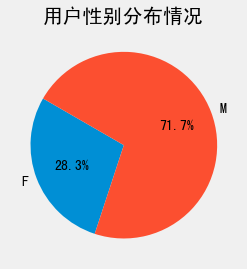

In [49]:
labels = ['F','M']
sizes = [1666, 4225]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title('用户性别分布情况')

可以看出，本次黑色星期五用户中，男性用户约为女性用户的2.5倍，男性消费水平是女性消费水平的3.3倍，男性在数量和消费金额上都比女性多。


**用户年龄分布和消费情况**

In [62]:
data.drop_duplicates('User_ID').groupby('Age')['User_ID'].count()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

**各年龄层人数统计**

In [54]:
data.groupby('Age')['Purchase'].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

**各年龄层消费金额统计**

In [100]:
data_age_count = data.drop_duplicates('User_ID').groupby('Age')['User_ID'].count().to_frame().reset_index()


In [101]:
data_age_count

,Age,User_ID
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


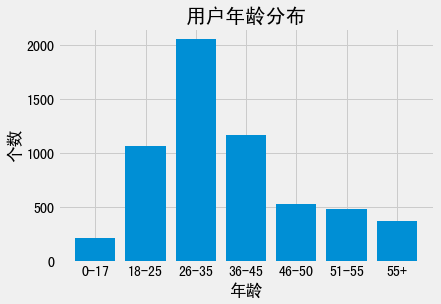

In [102]:
plt.plot(figsize = (15,10))
plt.bar(data_age_count['Age'],data_age_count['User_ID'])
plt.xlabel('年龄')
plt.ylabel('个数')
plt.title('用户年龄分布')
plt.show()

In [104]:
data_purchase_count = data.groupby('Age')['Purchase'].sum().to_frame().reset_index()


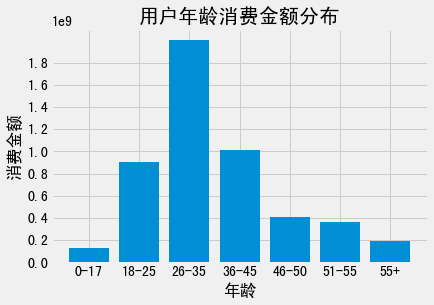

In [109]:
plt.plot(figsize = (15,10))
plt.bar(data_purchase_count['Age'],data_purchase_count['Purchase'])
plt.xlabel('年龄')
plt.ylabel('消费金额')
plt.title('用户年龄消费金额分布')
plt.yticks(np.arange(0, 2000000000, 200000000))  
plt.show()

用户年龄主要集中在18-45之间，其中26-35用户数占比总用户数的34.9%，消费金额占总销售额的40%，可见这个年龄段是本次活动的主力军。

**用户职业分布和消费情况**

In [111]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [113]:
data.drop_duplicates('User_ID').groupby('Occupation')['User_ID'].count().sort_values(ascending = False)

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
13    140
15    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: User_ID, dtype: int64

用户职业分布

In [114]:
data.groupby('Occupation')['Purchase'].sum().sort_values(ascending = False)

Occupation
4     657530393
0     625814811
7     549282744
1     414552829
17    387240355
12    300672105
20    292276985
14    255594745
16    234442330
2     233275393
6     185065697
3     160428450
15    116540026
10    114273954
5     112525355
11    105437359
19     73115489
13     71135744
18     60249706
9      53619309
8      14594599
Name: Purchase, dtype: int64

4，0，7三个职业用户数占总用户数的35.6%，其消费金额前三也是4，0，7，可见，这三个职业的消费人数和消费金额大于其他职业。



**用户婚姻分布和消费情况**

In [115]:
data.drop_duplicates('User_ID').groupby('Marital_Status')['User_ID'].count()



Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [117]:
data.groupby('Marital_Status')['Purchase'].sum()



Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64

In [118]:
data.groupby('Marital_Status')['Purchase'].sum()/data.groupby('Marital_Status')['User_ID'].count()

Marital_Status
0    9333.325467
1    9334.632681
dtype: float64

未婚在本次活动中占比大于已婚，但是未婚和已婚在人均消费情况下基本一致，可见婚姻状态对消费金额影响不是很大。

**用户城市居住时间分布和消费情况**

In [120]:
data.drop_duplicates('User_ID').groupby('Stay_In_Current_City_Years')['User_ID'].count()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [122]:
data.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64

当前城市居住时间大部分是在1年，消费水平在四个类别中最高。

### 商品画像 

- 最受喜爱的商品分布和消费情况
- 男女消费者喜爱的商品分布和消费情况
- 未婚和已婚喜欢的商品分布和消费情况
- 不同城市喜欢的商品分布和消费情况

**最受喜爱的商品分布和消费情况**

In [125]:
#销量TOP10商品
data.groupby('Product_ID')['User_ID'].count().sort_values(ascending=False).head(10)

Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
Name: User_ID, dtype: int64

In [127]:
#销售金额TOP10商品
data.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10)

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
P00112142    23882624
P00110942    23232538
P00237542    23096487
P00057642    22493690
P00010742    21865042
Name: Purchase, dtype: int64

最受喜爱的商品前十分布和成交金额最多的商品重叠部分较少,销售金额=商品数量×商品单价

**男女消费者喜爱的商品分布和消费情况**

In [134]:
#男性消费者喜爱哪些商品

data[data['Gender']=='M'].groupby('Product_ID')['User_ID'].count().sort_values(ascending = False).head(10)

Product_ID
P00265242    1353
P00025442    1245
P00110742    1234
P00112142    1207
P00057642    1174
P00184942    1131
P00046742    1116
P00237542    1092
P00145042    1086
P00010742    1056
Name: User_ID, dtype: int64

In [135]:
#女性消费者喜爱哪些商品
data[data['Gender']=='F'].groupby('Product_ID')['User_ID'].count().sort_values(ascending = False).head(10)

Product_ID
P00265242    505
P00220442    427
P00058042    378
P00255842    366
P00034742    358
P00110742    357
P00110842    351
P00059442    350
P00117442    346
P00000142    342
Name: User_ID, dtype: int64

P00265242,P00025442在男女中都比较受欢迎,但是其他商品未显示太多关联性,需结合业务情况具体分析,进而根据性别进行细化广告投放

**未婚和已婚喜欢的商品分布和消费情况**

In [136]:
#未婚用户最受喜爱前十的商品名
data[data['Marital_Status']== 0 ].groupby('Product_ID')['User_ID'].count().sort_values(ascending = False).head(10)

Product_ID
P00265242    1076
P00110742     954
P00025442     951
P00112142     922
P00145042     862
P00057642     859
P00046742     858
P00237542     844
P00184942     835
P00255842     828
Name: User_ID, dtype: int64

In [137]:
#已婚用户最受喜爱前十的商品名
data[data['Marital_Status']== 1 ].groupby('Product_ID')['User_ID'].count().sort_values(ascending = False).head(10)

Product_ID
P00265242    782
P00110742    637
P00025442    635
P00112142    617
P00184942    589
P00058042    579
P00057642    571
P00059442    567
P00010742    565
P00046742    559
Name: User_ID, dtype: int64

未婚用户和已婚用户最受喜爱前十商品中有7个是一样的，可以大致看出在是否结婚对商品的需求影响不明显。

**不同城市喜欢的商品分布和消费情况**

In [140]:
#A城市
data[data['City_Category']=='A'].groupby('Product_ID')['User_ID'].count().sort_values(ascending=False).head(10)


Product_ID
P00265242    396
P00110742    322
P00025442    317
P00278642    314
P00057642    307
P00059442    305
P00112142    303
P00255842    300
P00145042    299
P00110842    296
Name: User_ID, dtype: int64

In [141]:
#B城市
data[data['City_Category']=='B'].groupby('Product_ID')['User_ID'].count().sort_values(ascending=False).head(10)


Product_ID
P00265242    626
P00110742    581
P00025442    550
P00046742    531
P00112142    530
P00058042    528
P00145042    523
P00184942    518
P00010742    508
P00059442    507
Name: User_ID, dtype: int64

In [142]:
#C城市
data[data['City_Category']=='C'].groupby('Product_ID')['User_ID'].count().sort_values(ascending=False).head(10)


Product_ID
P00265242    836
P00025442    719
P00112142    706
P00110742    688
P00184942    639
P00057642    623
P00046742    614
P00117942    598
P00255842    593
P00010742    591
Name: User_ID, dtype: int64

 A，B，C三城市最受欢迎的商品都是P00265242，其他商品三座城市的重叠率高，可见，ABC城市的人群在商品需求方面比较类似。

## 总结

本文利用实际数据进行分析，从 销售画像，用户画像、商品画像三个维度展开，基于Python的数据处理，可视化展示等技术分析数据的内在特性。